In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
df = pd.read_csv(r'C:\Users\panov\Desktop\Games.csv')

### Primary data viewing. We look at whether the data was opened correctly, we look at general information, data types, omissions.

In [284]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [285]:
df.tail()

,Name,Sales,Series,Release,Genre,Developer,Publisher
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,Oct-01,Business simulation,Microsoft,Blue Fang Games


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [287]:
df.shape

(175, 7)

In [288]:
df.describe(include = "all")

,Name,Sales,Series,Release,Genre,Developer,Publisher
count,175,175.000000,139,175,175,175,175
unique,175,NaN,91,130,61,109,96
top,PlayerUnknown's Battlegrounds,NaN,Command & Conquer,Mar-04,Real-time strategy,Blizzard Entertainment,Electronic Arts
freq,1,NaN,5,4,24,8,19
mean,NaN,3.141143,NaN,NaN,NaN,NaN,NaN
std,NaN,4.960513,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [289]:
df.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

### We see that there are missing values. Replace these values with a custom one

In [290]:
df['Series'].fillna('Unknown', inplace = True)

In [291]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,May-11,Action-adventure,Re-Logic,Re-Logic


In [246]:
df.isna().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

### The release date is incorrect, let's fix it.

In [247]:
df['Release']=pd.to_datetime(df['Release'],format='%b-%y')

In [248]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [249]:
df['Release_Year'] = df['Release'].apply(lambda x: x.year)

In [250]:
df['Release_Month'] = df['Release'].apply(lambda x: x.month)

In [251]:
df = df.drop('Release', axis=1)

In [252]:
df.head()

,Name,Sales,Series,Genre,Developer,Publisher,Release_Year,Release_Month
0,PlayerUnknown's Battlegrounds,42.0,Unknown,Battle royale,PUBG Studios,Krafton,2017,12
1,Minecraft,33.0,Minecraft,"Sandbox, survival",Mojang Studios,Mojang Studios,2011,11
2,Diablo III,20.0,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012,5
3,Garry's Mod,20.0,Unknown,Sandbox,Facepunch Studios,Valve,2006,11
4,Terraria,17.2,Unknown,Action-adventure,Re-Logic,Re-Logic,2011,5


### The data is ready, let's move on to analytics. To begin with, let's define the most popular genres

In [253]:
populars = (df.groupby(['Genre'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False))

In [254]:
populars


,Genre,Sales
1,Action role-playing,58.1
39,Real-time strategy,55.0
12,Battle royale,52.0
22,First-person shooter,46.0
45,"Sandbox, survival",33.0
...,...,...
40,"Real-time strategy, grand strategy wargame",1.0
33,Platform,1.0
38,Rail shooter,1.0
34,Point-and-click,1.0


In [255]:
(df.groupby(['Genre'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False))

,Genre,Sales
1,Action role-playing,58.1
39,Real-time strategy,55.0
12,Battle royale,52.0
22,First-person shooter,46.0
45,"Sandbox, survival",33.0
...,...,...
40,"Real-time strategy, grand strategy wargame",1.0
33,Platform,1.0
38,Rail shooter,1.0
34,Point-and-click,1.0


<AxesSubplot:xlabel='Sales', ylabel='Genre'>

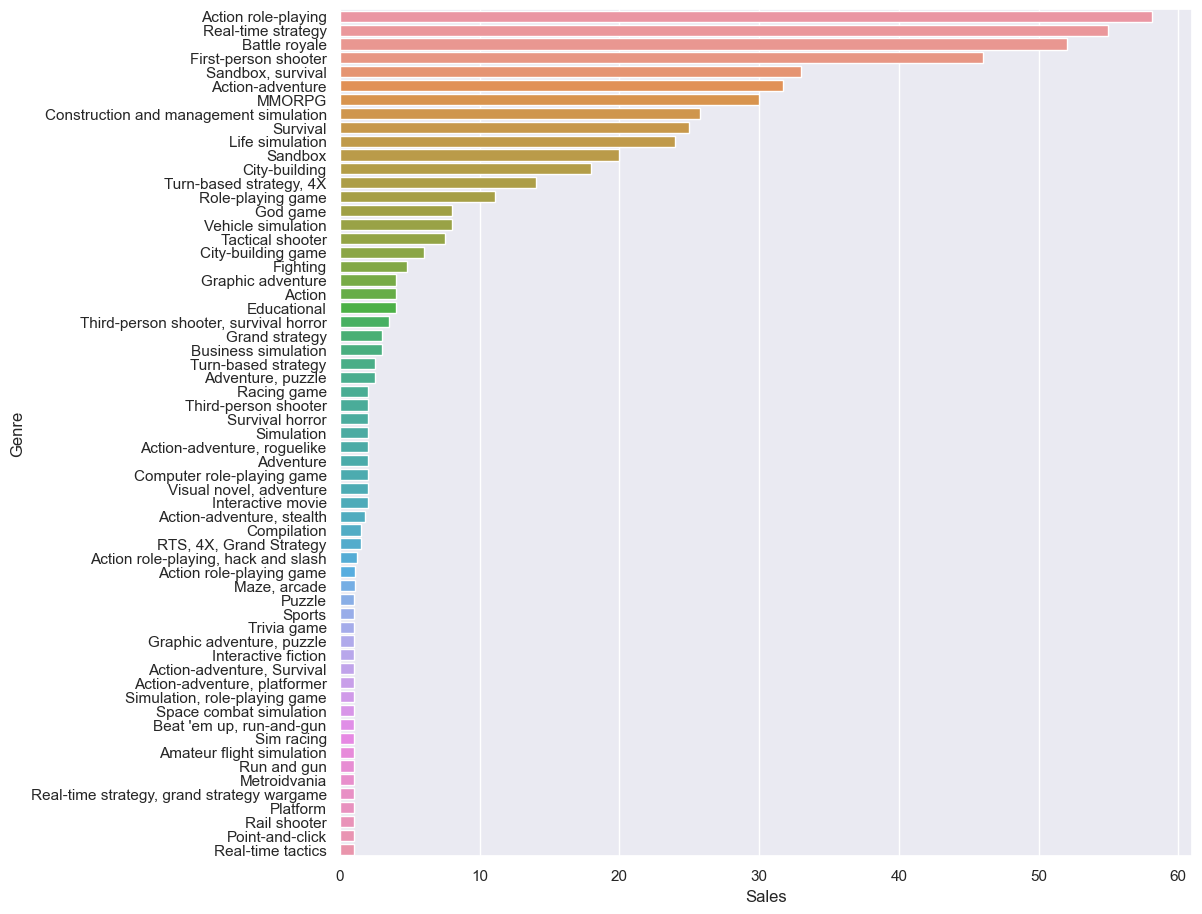

In [256]:
sns.set(rc={'figure.figsize':(11,11)})
sns.barplot(x = 'Sales', y = 'Genre', data = populars)




### The publisher that released the most games

In [257]:
top_publisher = df.groupby(['Publisher'], as_index = False) \
    .agg({'Name':'count'}) \
    .rename(columns = {'Name' : 'Count'}) \
    .sort_values('Count', ascending = False)

In [258]:
top_publisher.query('Count == 1')

,Publisher,Count
92,Warhorse Studios,1
66,Sega,1
89,Valve,1
63,Re-Logic,1
59,Mojang Studios,1
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


### We have a lot of publishers with only one edition, let's not include them in the rating

In [259]:
top_publishers = top_publisher.query('Count > 1')
top_publishers

,Publisher,Count
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
57,Microsoft,4
16,Capcom,4
40,Gathering of Developers,4
14,CD Projekt,3
80,THQ,3


<AxesSubplot:xlabel='Count', ylabel='Publisher'>

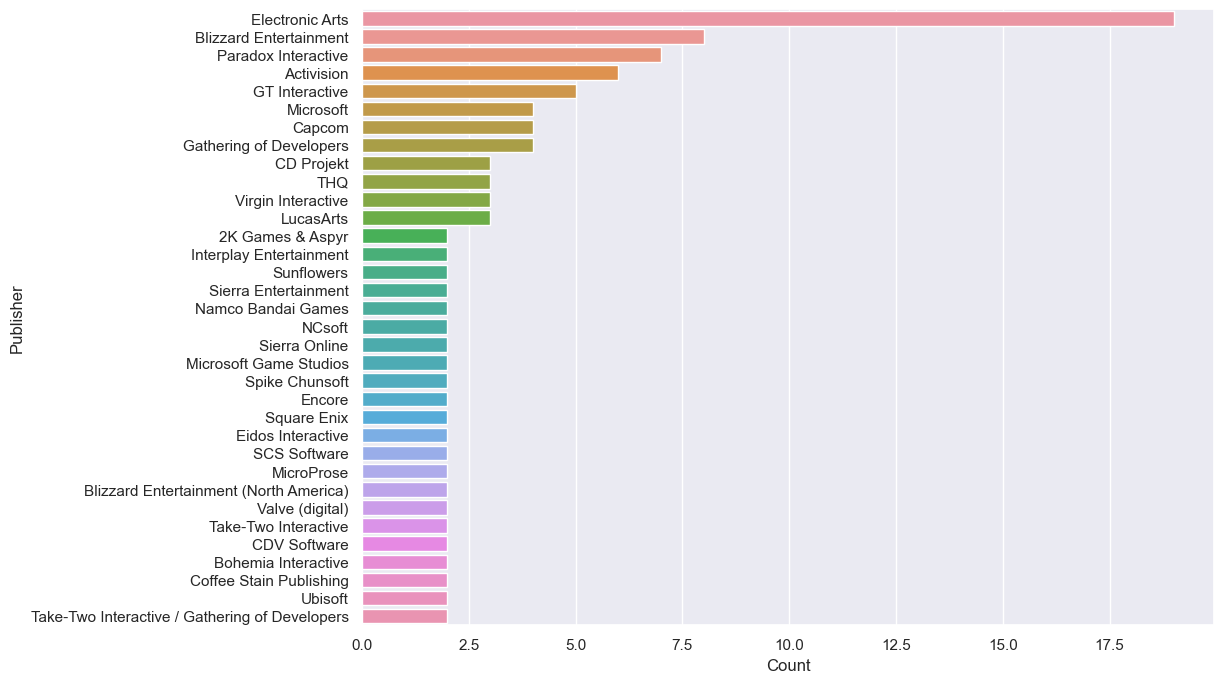

In [260]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x = 'Count', y = 'Publisher', data = top_publishers)


In [261]:
profitable_publishers = df.groupby(['Publisher'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False).head(5)

<AxesSubplot:xlabel='Publisher', ylabel='Sales'>

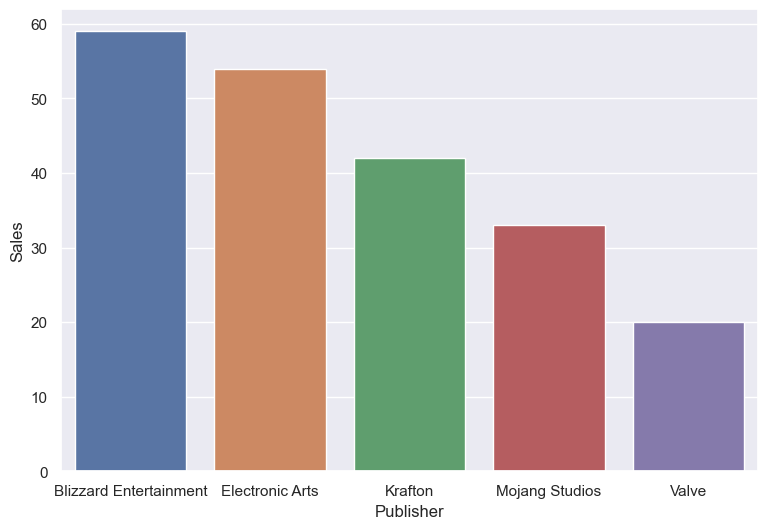

In [262]:
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(x = 'Publisher', y = 'Sales', data = profitable_publishers)

#### Despite the fact that EA published the most games, Blizzard earned the most

### Let's find the developer who released the most games

In [263]:
top_developers = df.groupby(['Developer'], as_index = False) \
    .agg({'Name':'count'}) \
    .rename(columns = {'Name' : 'Count'}) \
    .sort_values('Count', ascending = False) \
    .head(5)
top_developers

,Developer,Count
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4


[Text(0, 0, 'Blizzard Entertainment'),
 Text(1, 0, 'Maxis'),
 Text(2, 0, 'Paradox Development Studio'),
 Text(3, 0, 'id Software'),
 Text(4, 0, 'Westwood Studios')]

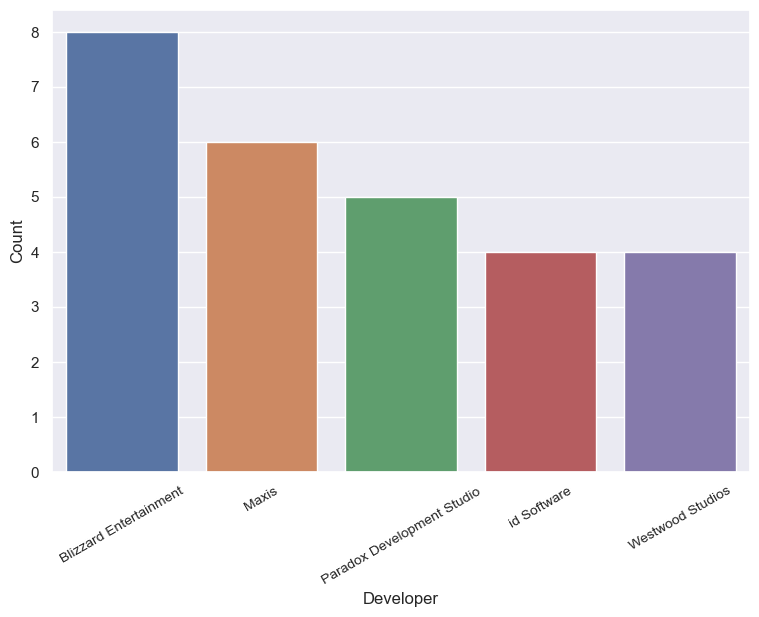

In [264]:
sns.set(rc={'figure.figsize':(9,6)})
ax = sns.barplot(x = 'Developer', y = 'Count', data = top_developers)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 10)

In [265]:
profitable_developers = df.groupby(['Developer'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False).head(5)
profitable_developers

,Developer,Sales
6,Blizzard Entertainment,58.0
69,PUBG Studios,42.0
65,Mojang Studios,33.0
60,Maxis,33.0
34,Facepunch Studios,29.0


<AxesSubplot:xlabel='Developer', ylabel='Sales'>

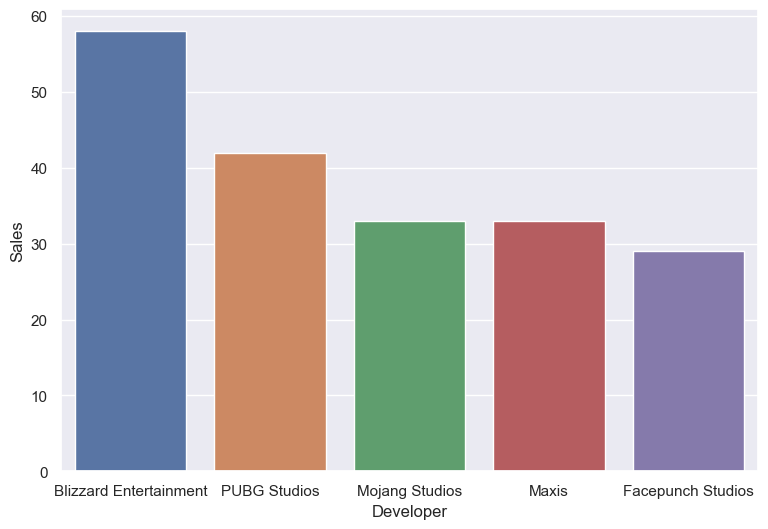

In [266]:
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(x = 'Developer', y = 'Sales', data = profitable_developers)


#### Among the developers Blizzard proved to be the most successful in all aspects

### Let's find the longest and most popular series of games

In [267]:
top_series = df.groupby(['Series'], as_index = False) \
    .agg({'Name':'count'}) \
    .rename(columns = {'Name' : 'Count'}) \
    .sort_values('Count', ascending = False) \
    .query ("Series != 'Unknown'") \
    .head(5)
top_series

,Series,Count
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
22,Diablo,3


<AxesSubplot:xlabel='Series', ylabel='Count'>

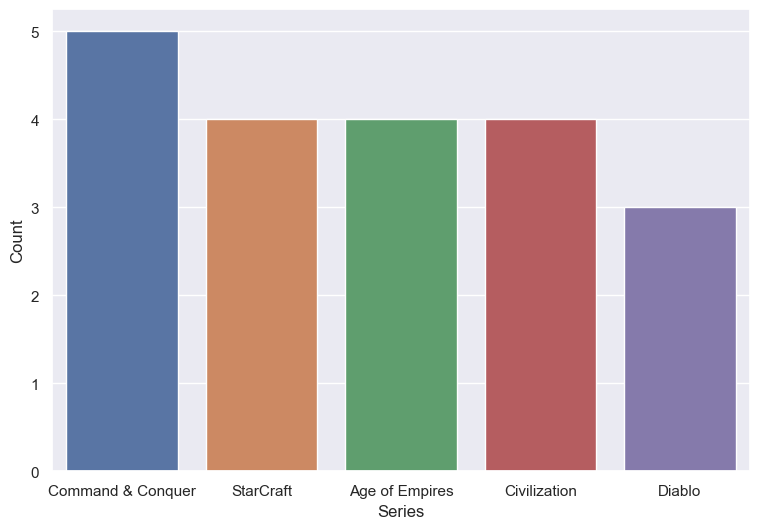

In [268]:
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(x = 'Series', y = 'Count', data = top_series)

In [269]:
profitable_series = df.groupby(['Series'], as_index = False) \
    .agg({'Sales':'sum'}) \
    .sort_values('Sales', ascending = False) \
    .query ("Series != 'Unknown'") \
    .head(5)
profitable_series

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
86,Warcraft,19.0


<AxesSubplot:xlabel='Series', ylabel='Sales'>

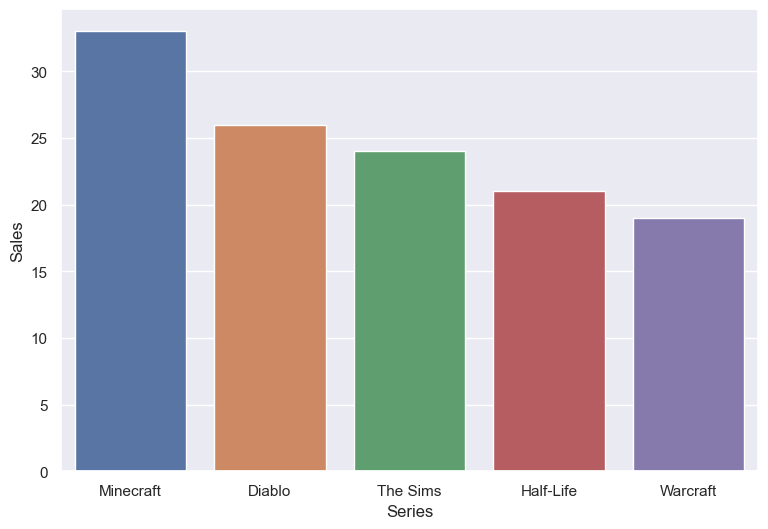

In [270]:
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(x = 'Series', y = 'Sales', data = profitable_series)

#### The longest series turned out to be Command & Conquer, and the best-selling Minecraft

### And now let's look at the trend of game releases by year

In [280]:
sort_by_year = df.groupby(['Release_Year'], as_index = False) \
    .agg({'Name':'count'}) \
    .rename(columns={'Name':'Count'}) \
    .sort_values('Release_Year')
sort_by_year

,Release_Year,Count
0,1984,1
1,1985,2
2,1988,3
3,1989,1
4,1993,4
5,1994,2
6,1995,6
7,1996,7
8,1997,7
9,1998,8


[Text(0.5, 0, 'Release Year')]

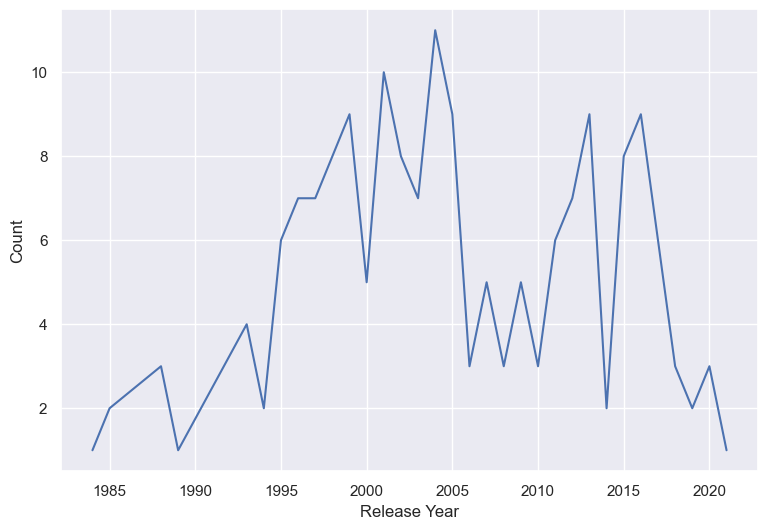

In [281]:
sns.lineplot(data=sort_by_year, x="Release_Year", y="Count").set(xlabel='Release Year')

### The peak of releases occurred from 1995 to 2005